In [1]:
# Variables
file_path_embedding = './scifi-films.emb'
file_path_edges = './scifi_films_edgelist.txt'

train_ratio = 0.7

batch_size = 128
epochs = 10

In [13]:
embedding_file = ["3 3", "0 0 0 1", "1 1 0 0", "2 0 1 0"]
edges_file = ["0 1 TEST", "0 2 TEST", "0 1 PROTO"]

In [4]:
from keras.models import Sequential
from keras.layers import *
import keras.backend as K
import numpy as np

Using TensorFlow backend.


In [5]:
embedding_file = open(file_path_embedding, 'r')

In [6]:
edges_file = open(file_path_edges, 'r')

In [11]:
# Read embeddings
embeddings = {}
first = True
for line in embedding_file:
    if first:
        first = False
        continue
    
    data = line.split(" ")
    embeddings[int(data[0])] = data[1:]
embedding_size = len(embeddings[0])

In [15]:
# Read edges
edges = {}
classes = set()
first = False
for line in edges_file:
    if first:
        first = False
        continue
    
    data = line.strip().split(" ")
    edge = (int(data[0]), int(data[1]))
    
    if len(data) < 3:
        data.append("")
    classes.add(data[2])
    if edge not in edges.keys():
        edges[edge] = [data[2]]
    else:
        edges[edge].append(data[2])

In [16]:
len(edges)

2

In [17]:
# Map classes to integers
class_mapping = {}
i = 0
for c in classes:
    class_mapping[c] = i
    i += 1

In [18]:
# Preprocessing functions
def multi_hot(types):
    vec = np.zeros(len(classes))
    x = True
    for t in types:
        x = False
        vec[class_mapping[t]] = 1
    if x:
        print(":(")
    return vec

def preprocess(pair, types):
    x = np.array(embeddings[pair[0]] + embeddings[pair[1]])
    y = multi_hot(types)
    return x, y

In [19]:
# Preprocess data
data = []
x_len = 2*embedding_size
for key in edges.keys():
    x, y = preprocess(key, edges[key])
    data.append(np.append(x, y))
data = np.array(data).astype(np.float)

In [20]:
# Split data in to training and test set
np.random.shuffle(data)
x = data[:, :x_len]
y = data[:, x_len:]

training_size = int(len(data) * train_ratio)

x_train = x[:training_size]
y_train = y[:training_size]
x_test = x[training_size:]
y_test = y[training_size:]

In [21]:
(len(x_train), len(x_test))

(1, 1)

In [22]:
embedding_size

3

In [23]:
len(classes)

2

In [24]:
# Baseline Model
model = Sequential()
model.add(Dense(200, input_dim=embedding_size*2))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(len(classes)))

In [25]:
# Training the model
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['binary_accuracy'])

model.fit(x_train, y_train,
          epochs=epochs,
          batch_size=batch_size)

Epoch 1/10
1/1 [==============================] - 0s 94ms/step - loss: 1.4676 - binary_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 2ms/step - loss: 1.5120 - binary_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/step - loss: 1.4384 - binary_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/step - loss: 1.3865 - binary_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/step - loss: 1.3863 - binary_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 2ms/step - loss: 1.3863 - binary_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 2ms/step - loss: 1.3863 - binary_accuracy: 0.0000e+00
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 1.3863 - binary_accuracy: 0.0000e+00
Epoch 9/10
1/1 [==============================] - 0s 2ms/step - loss: 1.3863 - binary_accuracy: 0.0000e+00
Epoch 10/10
1/1 [===================

In [26]:
score = model.evaluate(x_test, y_test, batch_size=batch_size)
score

1/1 [==============================] - 0s 38ms/step


[0.38207074999809265, 0.5]

In [27]:
y_predicted = np.around(model.predict(x_test))

In [28]:
# Visualize Results
import matplotlib.pyplot as plt

/usr/lib/python3/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/lib/python3/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [29]:
expected = np.sum(y_test.astype(np.float), axis=0)
actual = np.sum(y_predicted, axis=0)

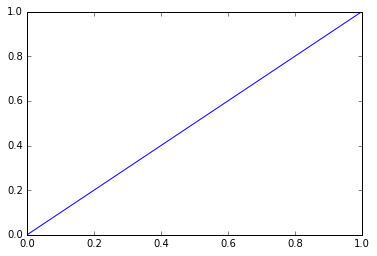

In [30]:
plt.plot(expected)

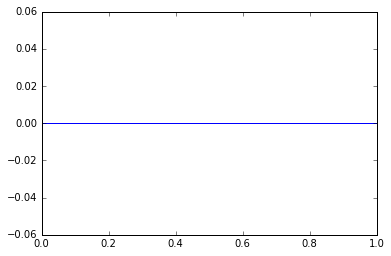

In [31]:
plt.plot(actual)

In [32]:
limit = 20
labels = np.arange(len(df_sorted['type'][:limit]))
plt.figure(figsize=(20, 5))
plt.bar(labels, df_sorted['count'][:limit] / total, color="red", edgecolor="red", width=0.8)
plt.xticks(labels, df_sorted['type'][:limit], rotation=90)
plt.show()

NameError: name 'df_sorted' is not defined